In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('data\\Data_avecfeature_clean_normalisé.csv', sep=',',index_col=None, header=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    324 non-null    object 
 1   Mortgage_15yr           324 non-null    float64
 2   Gross Domestic Product  324 non-null    float64
 3   Home_price_index        324 non-null    float64
 4   Economic_growth         324 non-null    float64
 5   Construction_inflation  324 non-null    float64
 6   Wealth_density_index    324 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.8+ KB
None


In [2]:
from sklearn.model_selection import train_test_split
# Diviser les données en variables explicatives (X) et la variable cible (y)
X = df.drop(columns=['DATE', 'Home_price_index'])
y = df['Home_price_index']

# Diviser les données en ensembles d'entraînement et de test (80% d'entraînement, 20% de test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Régression régularisée : Ridge [expérimenter avec différentes valeurs d'alpha ]

Mean Squared Error du Model de Regresion Ridge  : 388.4281224044399
Coefficient de détermination (R²) du Model de Regresion Ridge : 0.7807388114776183


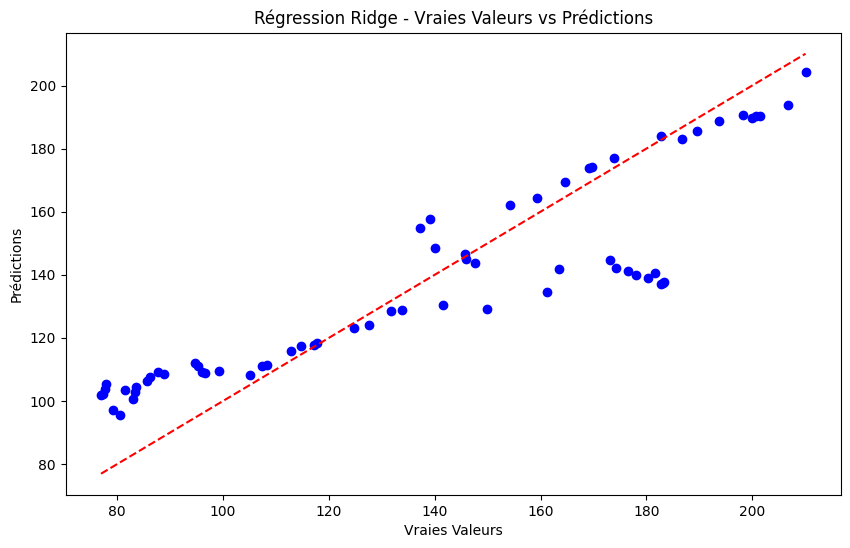

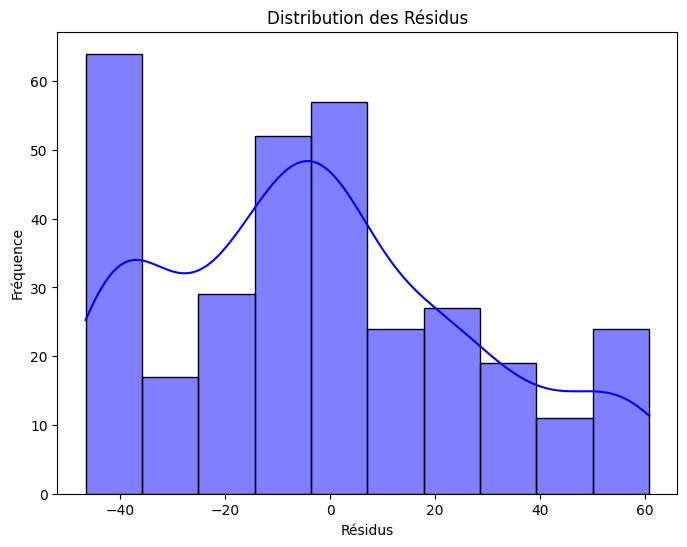

In [5]:
################### Tester le Model de Regresion Ridge ###################################

from sklearn.linear_model import Ridge

# Initialiser le modèle de régression Ridge avec un alpha arbitraire (paramètre de régularisation)
ridge_model = Ridge(alpha=5)


# Entraîner le modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_ridge = ridge_model.predict(X_test)

########################## Evaluation du Model RIDGE ##########################################################
# Évaluer les performances du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)

print("Mean Squared Error du Model de Regresion Ridge  :", mse_ridge )
print("Coefficient de détermination (R²) du Model de Regresion Ridge :", r2_ridge)


# Tracer les vraies valeurs par rapport aux prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Régression Ridge - Vraies Valeurs vs Prédictions')
plt.show()


# Obtenir les prédictions sur les données de validation de chaque pli
predicted_ridge = cross_val_predict(ridge_model , X, y, cv=5)

# Calculer les résidus
residuals_ridge  = y - predicted_ridge


# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_ridge  , kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

Recherche d'hyperparamètres

In [6]:
#########   Recherche d'hyperparamètres pour trouver la valeur optimale du paramètre de régularisation (alpha)

#Sélection de l'alpha optimal
from sklearn.model_selection import GridSearchCV

# Définir la grille des valeurs d'alpha à tester
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
              'tol': [0.0001, 0.001, 0.01],
              'max_iter': [100, 500, 1000]}
"""Voici une explication de chaque paramètre utilisé dans la recherche des hyperparamètres pour trouver 
la valeur optimale du paramètre de régularisation (alpha) à l'aide de la régression Ridge avec la méthode 
de recherche par grille (GridSearchCV) :

1. **alpha** : C'est le paramètre de régularisation dans la régression Ridge. Il contrôle la force de la 
régularisation appliquée au modèle. Une valeur plus élevée d'alpha entraîne une régularisation plus forte, 
ce qui peut aider à prévenir le surajustement (overfitting). 

2. **solver** : C'est l'algorithme utilisé pour résoudre le problème d'optimisation lors de l'ajustement
 du modèle. Les différentes options disponibles sont :
   - 'auto' : L'algorithme est sélectionné automatiquement en fonction des données.
   - 'svd' : Décomposition en valeurs singulières.
   - 'cholesky' : Décomposition de Cholesky.
   - 'lsqr' : Solution de moindres carrés par l'algorithme des moindres carrés restreints.
   - 'sag' : Algorithme de descente de gradient stochastique amélioré.
   
3. **tol** : Il s'agit de la tolérance pour la convergence de l'algorithme d'optimisation. 
L'optimisation s'arrête lorsque la variation entre deux itérations successives est inférieure ou égale à 
cette tolérance. Les valeurs testées dans la grille sont [0.0001, 0.001, 0.01].

4. **max_iter** : C'est le nombre maximum d'itérations autorisées pour la convergence de l'algorithme 
d'optimisation. Si la convergence n'est pas atteinte après ce nombre d'itérations, l'algorithme s'arrête. 
Les valeurs testées dans la grille sont [100, 500, 1000].
."""

# Initialiser l'estimateur Ridge
ridge = Ridge()

# Initialiser GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params_ridge=grid_search.best_params_
print("Meilleurs hyperparamètres pour le  Model de Regresion Ridge :", grid_search.best_params_)


c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Meilleurs hyperparamètres pour le  Model de Regresion Ridge : {'alpha': 0.001, 'max_iter': 100, 'solver': 'svd', 'tol': 0.0001}


Initialiser le modèle Ridge avec l'alpha optimal

Mean Squared Error pour le Model de Regresion Ridge : 49.1332343520678
Coefficient de détermination (R²) pour le Model de Regresion Ridge: 0.9722651097111706


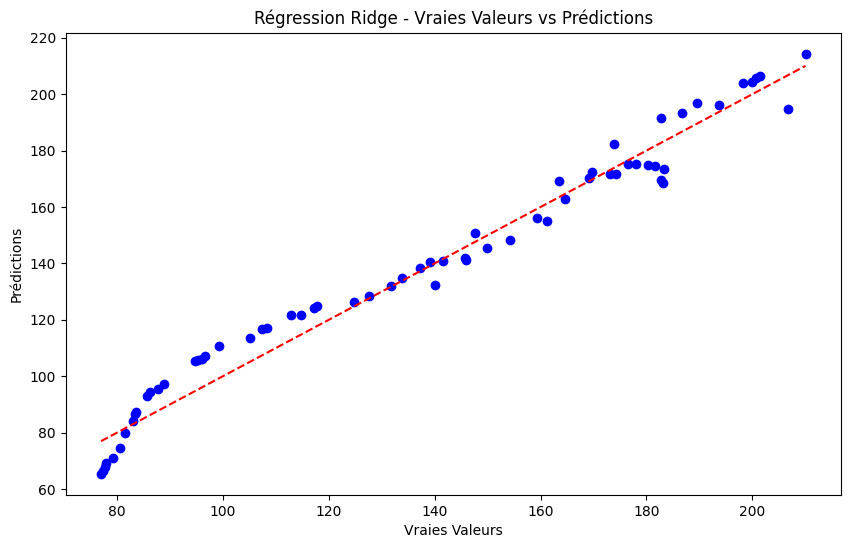

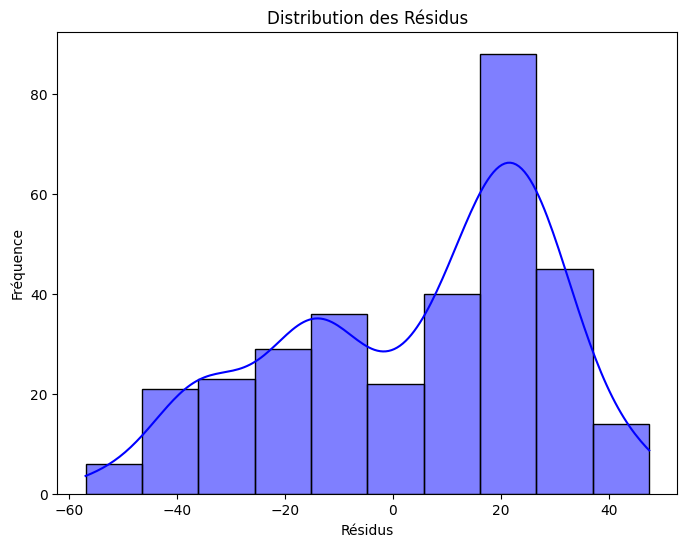

Test de Shapiro-Wilk pour le model de Regresion Ridge  :
Statistic pour le Model de Regresion Ridge: 0.9407646059989929
p-value pour le Model de Regresion Ridge:  4.28200447322169e-10
Les résidus ne semblent pas être distribués normalement pour le model de Regresion Ridge (p-value <= 0.05)


In [7]:
# Initialiser le modèle Ridge avec l'alpha optimal
#Meilleurs hyperparamètres pour le  Model de Regresion Ridge : 

################### Tester le Model de Regresion Ridge avec alpha optim ###################################

from sklearn.linear_model import Ridge

# Initialiser le modèle de régression Ridge avec un alpha arbitraire (paramètre de régularisation)
ridge_model = Ridge(**best_params_ridge)

# Entraîner le modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_ridge = ridge_model.predict(X_test)

########################## Evaluation du Model RIDGE ##########################################################
# Évaluer les performances du modèle
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test, y_pred_ridge)

print("Mean Squared Error pour le Model de Regresion Ridge :", mse_ridge )
print("Coefficient de détermination (R²) pour le Model de Regresion Ridge:", r2_ridge)


# Tracer les vraies valeurs par rapport aux prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred_ridge, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Régression Ridge - Vraies Valeurs vs Prédictions')
plt.show()


# Obtenir les prédictions sur les données de validation de chaque pli
predicted_ridge = cross_val_predict(ridge_model , X, y, cv=5)

# Calculer les résidus
residuals_ridge  = y - predicted_ridge


# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_ridge  , kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

#Tester la normalité des residus 
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_ridge, p_value_ridge = shapiro(residuals_ridge)

print("Test de Shapiro-Wilk pour le model de Regresion Ridge  :")
print("Statistic pour le Model de Regresion Ridge:", statistic_ridge)
print("p-value pour le Model de Regresion Ridge: ", p_value_ridge)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_ridge > alpha:
    print("Les résidus semblent être distribués normalement pour le model de Regresion Ridge (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le model de Regresion Ridge (p-value <= 0.05)")



Régression régularisée : Lasso

Mean Squared Error pour le Model de Regresion LASSO: 280.61692910727106
Coefficient de détermination (R²) pour le Model de Regresion LASSO: 0.8415964296954367


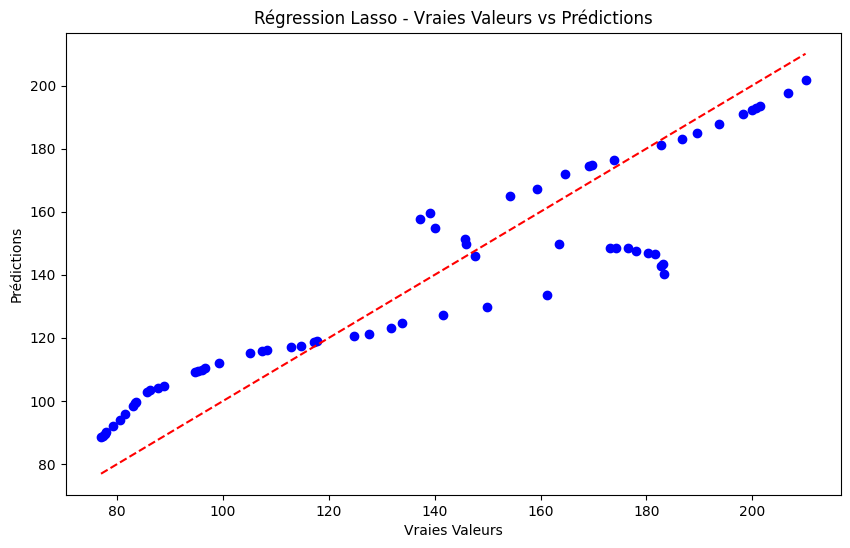

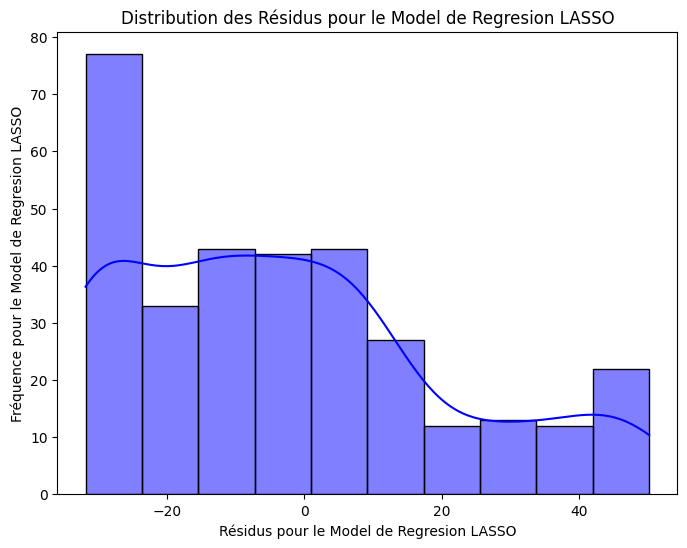

In [8]:

################### Tester le Model de Regresion LASSO  ###################################


from sklearn.linear_model import Lasso

# Initialiser le modèle de régression Lasso avec un alpha arbitraire (paramètre de régularisation)
lasso_model = Lasso(alpha=1.0)  # Vous pouvez ajuster alpha selon vos besoins

# Entraîner le modèle sur l'ensemble d'entraînement
lasso_model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_lasso= lasso_model.predict(X_test)

#########################  Evaluation de Régression régularisée : Lasso
# Évaluer les performances du modèle
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error pour le Model de Regresion LASSO:", mse_lasso)
print("Coefficient de détermination (R²) pour le Model de Regresion LASSO:", r2_lasso)



# Tracer les vraies valeurs par rapport aux prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Régression Lasso - Vraies Valeurs vs Prédictions')
plt.show()


# Obtenir les prédictions sur les données de validation de chaque pli
predicted_lasso = cross_val_predict(lasso_model , X, y, cv=5)

# Calculer les résidus
residuals_lasso = y - predicted_lasso

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lasso, kde=True, color='blue')
plt.title('Distribution des Résidus pour le Model de Regresion LASSO')
plt.xlabel('Résidus pour le Model de Regresion LASSO')
plt.ylabel('Fréquence pour le Model de Regresion LASSO')
plt.show()



Recherche d'hyperparamètres

In [9]:
#####################################    Sélection de alpha optimale pour le Model de Regresion LASSO  ##################################
# Définir la grille des valeurs d'alpha à tester
param_grid = {'alpha': [10**i for i in range(-5, 6)]}

"""alpha : C'est le paramètre de régularisation dans la régression LASSO. Comme pour la régression Ridge, 
il contrôle la force de la régularisation appliquée au modèle, mais avec une pénalité L1. Une valeur plus élevée
 d'alpha entraîne une régularisation plus forte, ce qui peut aider à prévenir le surajustement en forçant 
 certains coefficients de régression vers zéro."""

# Initialiser l'estimateur Lasso
lasso = Lasso()

# Initialiser GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour le Model de Regresion LASSO:", grid_search.best_params_)

best_params_lasso=grid_search.best_params_


c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.482e+03, tolerance: 3.332e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+03, tolerance: 3.487e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

Meilleurs hyperparamètres pour le Model de Regresion LASSO: {'alpha': 1e-05}


c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.408e+03, tolerance: 4.179e+01
  model = cd_fast.enet_coordinate_descent(


Initialiser le modèle Lasso avec l'alpha optimal

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.408e+03, tolerance: 4.179e+01
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error pour le Model de Regresion LASSO: 49.04095970580851
Coefficient de détermination (R²) pour le Model de Regresion LASSO: 0.972317197208039


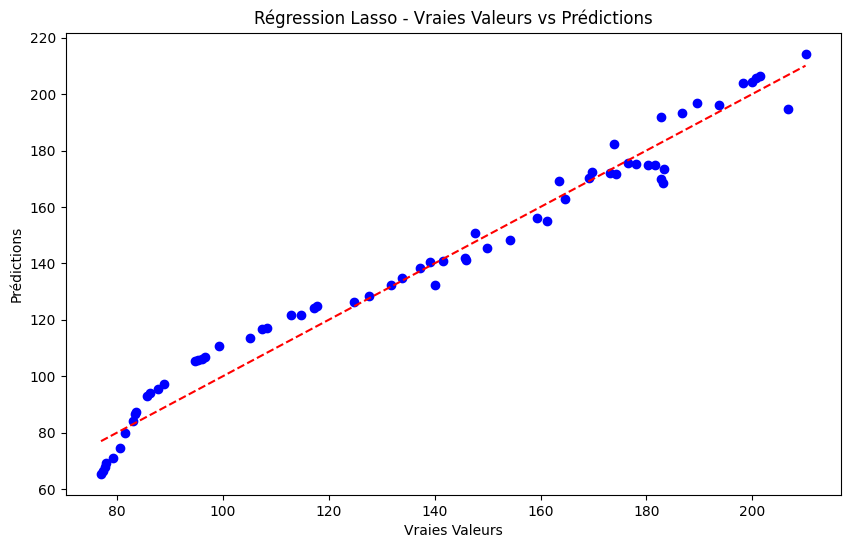

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+03, tolerance: 2.619e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.172e+03, tolerance: 4.542e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

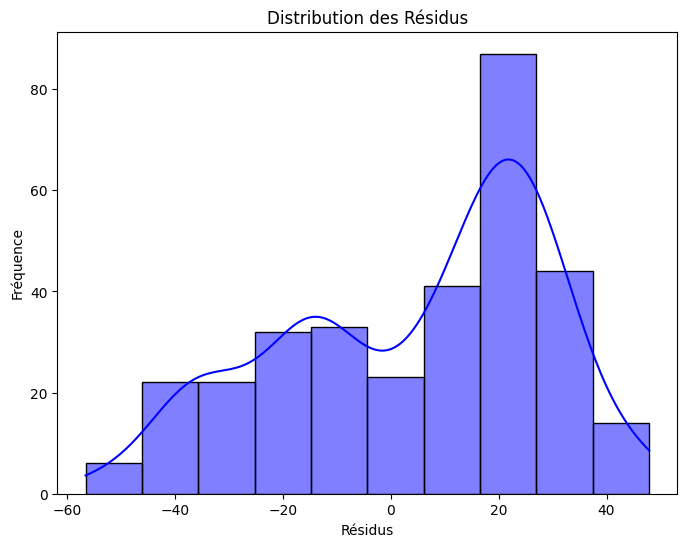

Test de Shapiro-Wilk pour le modèle de Régression Lasso :
Statistic: 0.9405737519264221
p-value: 4.0826184100062335e-10
Les résidus ne semblent pas être distribués normalement pour le modèle de Régression Lasso (p-value <= 0.05)


In [10]:
###################          Avec alpha optimal 1e-05  ###########################
#Meilleurs hyperparamètres pour le Model de Regresion LASSO: {'alpha': 0.0001}

from sklearn.linear_model import Lasso

# Initialiser le modèle de régression Lasso avec un alpha arbitraire (paramètre de régularisation)
lasso_model = Lasso(**best_params_lasso)  

# Entraîner le modèle sur l'ensemble d'entraînement
lasso_model.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_lasso= lasso_model.predict(X_test)

#########################  Evaluation de Régression régularisée : Lasso
# Évaluer les performances du modèle
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Squared Error pour le Model de Regresion LASSO:", mse_lasso)
print("Coefficient de détermination (R²) pour le Model de Regresion LASSO:", r2_lasso)


# Tracer les vraies valeurs par rapport aux prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Régression Lasso - Vraies Valeurs vs Prédictions')
plt.show()



# Obtenir les prédictions sur les données de validation de chaque pli
predicted_lasso = cross_val_predict(lasso_model , X, y, cv=5)

# Calculer les résidus
residuals_lasso = y - predicted_lasso

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lasso, kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Tester la normalité des résidus
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_lasso, p_value_lasso = shapiro(residuals_lasso)

print("Test de Shapiro-Wilk pour le modèle de Régression Lasso :")
print("Statistic:", statistic_lasso)
print("p-value:", p_value_lasso)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_lasso> alpha:
    print("Les résidus semblent être distribués normalement pour le modèle de Régression Lasso (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle de Régression Lasso (p-value <= 0.05)")


 Réeau de Neuron

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 20790.1934 - mse: 20744.7227 - val_loss: 21565.8027 - val_mse: 21074.1133
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21343.5684 - mse: 21344.6074 - val_loss: 21515.4844 - val_mse: 21024.4668
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21450.4590 - mse: 21528.0859 - val_loss: 21461.0156 - val_mse: 20970.6836
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20967.8125 - mse: 20958.6680 - val_loss: 21397.3770 - val_mse: 20907.8633
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20634.2676 - mse: 20595.6953 - val_loss: 21317.1133 - val_mse: 20828.7539
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21079.5781 - mse: 20962.7305 - val_loss: 21212.6152 - val_mse: 20725.8047
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 20617.5820 - mse: 20572.0469 - val_loss: 21077.4102 - val_mse: 20592.7051
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20070.7871 - mse: 

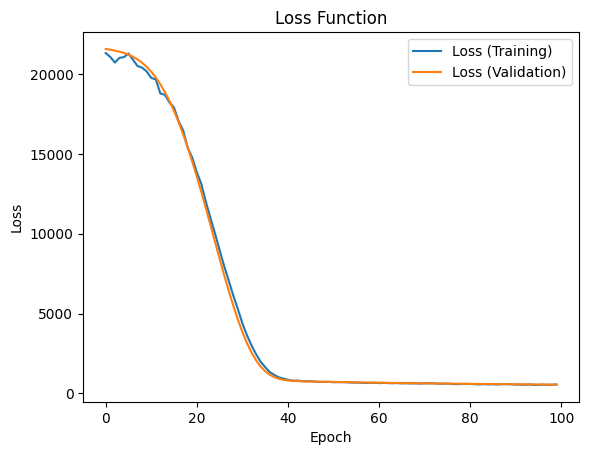

132    141.647
108    117.144
137    149.850
9       77.942
180    173.131
        ...   
104    114.812
231    139.154
60      87.615
94     108.302
265    169.125
Name: Home_price_index, Length: 65, dtype: float64
Test de Shapiro-Wilk pour le modèle de Réseau de Neurones :
Statistic: 0.9536535739898682
p-value: 0.016173189505934715
Les résidus ne semblent pas être distribués normalement pour le modèle de Réseau de Neurones (p-value <= 0.05)


In [15]:

################################## Réeau de Neuron #########################################################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialiser le modèle séquentiel
model_resau = Sequential()

# Ajouter des couches au modèle
model_resau.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_resau.add(Dense(32, activation='relu'))
model_resau.add(Dense(1))

# Compiler le modèle
model_resau.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
# Entraîner le modèle sur l'ensemble d'entraînement
history = model_resau.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



############################# Evaluation de reseau de Neuron #############
from sklearn.metrics import mean_squared_error, r2_score

# Prédire les valeurs sur l'ensemble d'entraînement et de test

y_test_pred_reseau = model_resau.predict(X_test)

# Calculer le Mean Squared Error (MSE) pour l'ensemble  de test
mse_resau = mean_squared_error(y_test, y_test_pred_reseau)

# Calculer le coefficient de détermination (R2) pour l'ensemble  de test
r2_reseau = r2_score(y_test, y_test_pred_reseau)

print("Mean Squared Error (MSE) pour Réeau de Neuron:", mse_resau)
print("Coefficient de détermination (R2) pour Réeau de Neuron:", r2_reseau)


# Tracer la perte du modèle sur les ensembles d'entraînement et de validation
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.legend()
plt.show()



# Calculer les résidus
residuals_neural_network = y_test - y_test_pred_reseau.flatten()
print(y_test)
# Tester la normalité des résidus
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_resau, p_value_resau = shapiro(residuals_neural_network)

print("Test de Shapiro-Wilk pour le modèle de Réseau de Neurones :")
print("Statistic:", statistic_resau)
print("p-value:", p_value_resau)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_resau > alpha:
    print("Les résidus semblent être distribués normalement pour le modèle de Réseau de Neurones (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle de Réseau de Neurones (p-value <= 0.05)")




SVR

Mean Squared Error (MSE) pour SVR: 681.1453781865779
Coefficient de détermination (R²) pour SVR: 0.6155048088351052


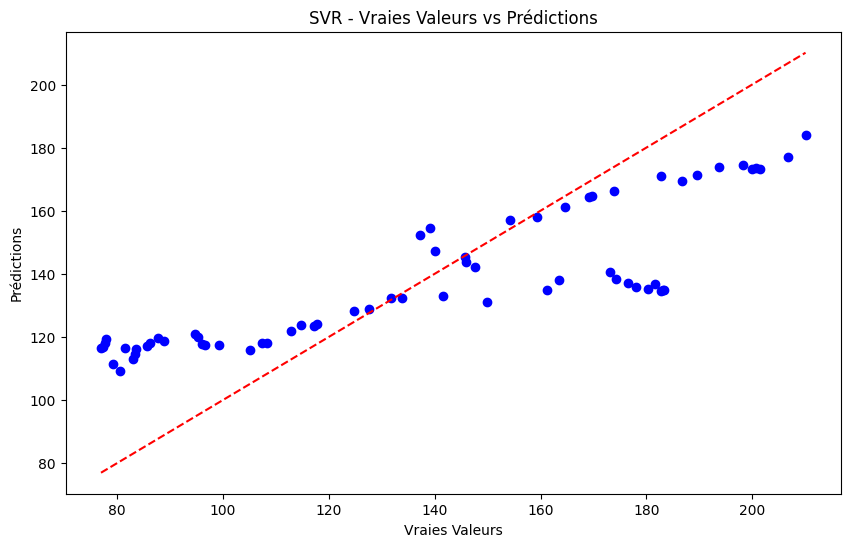

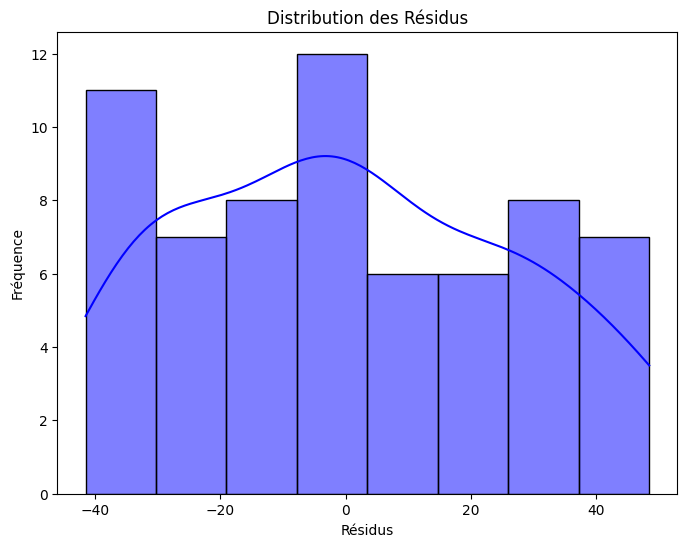

In [16]:
################################## SVR #########################################################

from sklearn.svm import SVR

# Initialiser le modèle SVR
svr_model = SVR(kernel='linear')

# Entraîner le modèle sur l'ensemble d'entraînement
svr_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_svr = svr_model.predict(X_test)

############################# Evaluation de SVR  #############


# Évaluer les performances du modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Squared Error (MSE) pour SVR:", mse_svr)
print("Coefficient de détermination (R²) pour SVR:", r2_svr)


# Calculer les résidus
residuals_svr = y_test - y_pred_svr

# Tracer les vraies valeurs par rapport aux prédictions du modèle SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('SVR - Vraies Valeurs vs Prédictions')
plt.show()


# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr, kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


Recherche d'hyperparamètres

In [10]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}

"""C : C'est le paramètre de régularisation dans un modèle SVM. Il contrôle la marge d'erreur tolérée par 
le modèle. Une valeur plus petite de C conduit à une marge plus grande et donc à une plus grande tolérance 
aux erreurs d'entraînement, tandis qu'une valeur plus grande de C conduit à une marge plus étroite et à une
 tolérance plus faible aux erreurs d'entraînement. Les valeurs testées dans la grille sont [0.1, 1, 10, 100].

gamma : C'est le coefficient du noyau dans un modèle SVM. Il contrôle la flexibilité du modèle en déterminant 
l'influence de chaque exemple d'entraînement sur la décision frontalière. Une valeur plus petite de gamma 
signifie une influence plus grande des exemples d'entraînement, ce qui conduit à une frontière de décision 
plus douce, tandis qu'une valeur plus grande de gamma signifie une influence plus limitée des exemples 
d'entraînement, ce qui conduit à une frontière de décision plus rigide. Les valeurs testées dans la grille 
sont [1, 0.1, 0.01, 0.001].

kernel : C'est le noyau à utiliser dans le modèle SVM. Les options disponibles sont :

'rbf' : Noyau gaussien radial.
'linear' : Noyau linéaire.
'poly' : Noyau polynomial."""
# Initialiser le modèle SVM
svm_model = SVR()

# Initialiser GridSearchCV pour la recherche d'hyperparamètres
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)
best_params_svr=grid_search.best_params_



Meilleurs hyperparamètres: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


initialiser SVR avec Meilleurs hyperparamètres: 


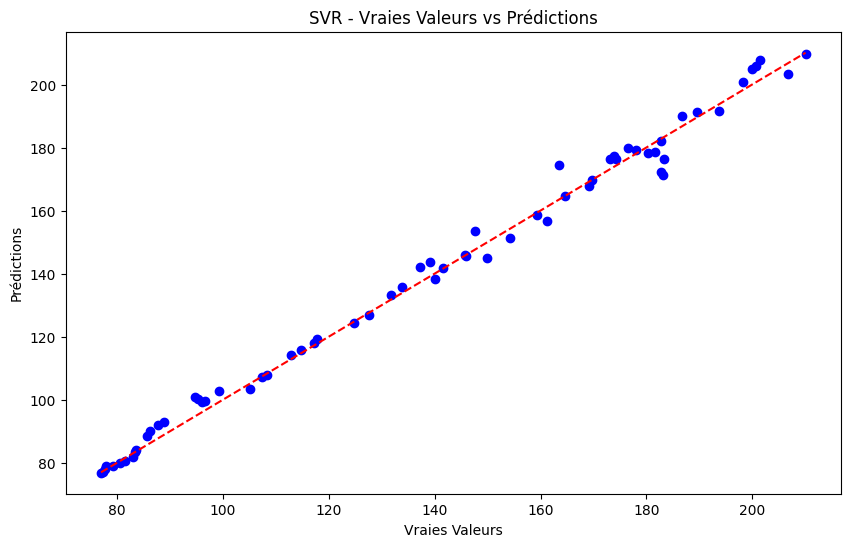

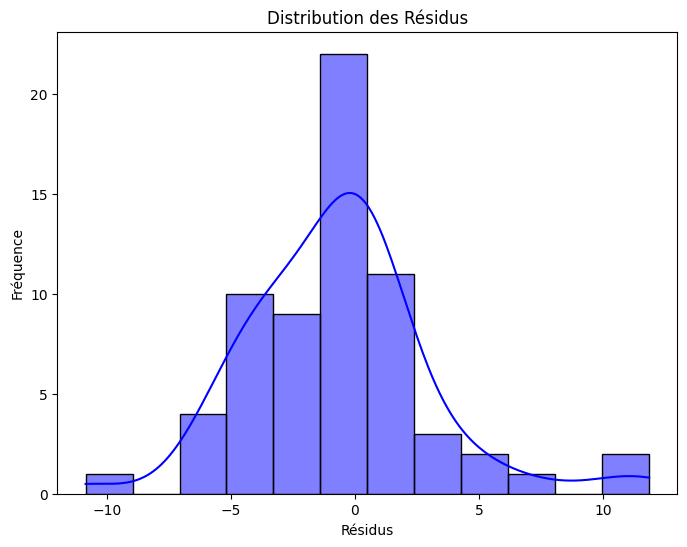

Test de Shapiro-Wilk pour le modèle SVR :
Statistic: 0.9398660063743591
p-value: 0.003424993483349681
Les résidus ne semblent pas être distribués normalement pour le modèle SVR (p-value <= 0.05)


In [13]:
#initialiser SVR avec Meilleurs hyperparamètres: 



# Initialiser le modèle SVM avec les meilleurs hyperparamètres
svr_model = SVR(**best_params_svr)

# Entraîner le modèle sur l'ensemble d'entraînement
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

########################## Évaluer les performances du modèle SVR apres choix d hyperparametres

# Évaluer les performances du modèle SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Mean Squared Error (MSE) pour SVR:", mse_svr)
print("Coefficient de détermination (R²) pour SVR:", r2_svr)
# Tracer les vraies valeurs par rapport aux prédictions du modèle SVR

plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_model.predict(X_test), color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('SVR - Vraies Valeurs vs Prédictions')
plt.show()

# Obtenir les prédictions sur les données de validation de chaque pli


# Calculer les résidus
residuals_svr = y_test - y_pred_svr


# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svr, kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


# Tester la normalité des résidus
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_svr, p_value_svr = shapiro(residuals_svr)

print("Test de Shapiro-Wilk pour le modèle SVR :")
print("Statistic:", statistic_svr)
print("p-value:", p_value_svr)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_svr > alpha:
    print("Les résidus semblent être distribués normalement pour le modèle SVR (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle SVR (p-value <= 0.05)")



DecisionTree

Erreur quadratique moyenne (RMSE) pour DecisionTree : 2.8258687486533027
Coefficient de détermination (R^2) pour DecisionTree : 0.9954922993076135


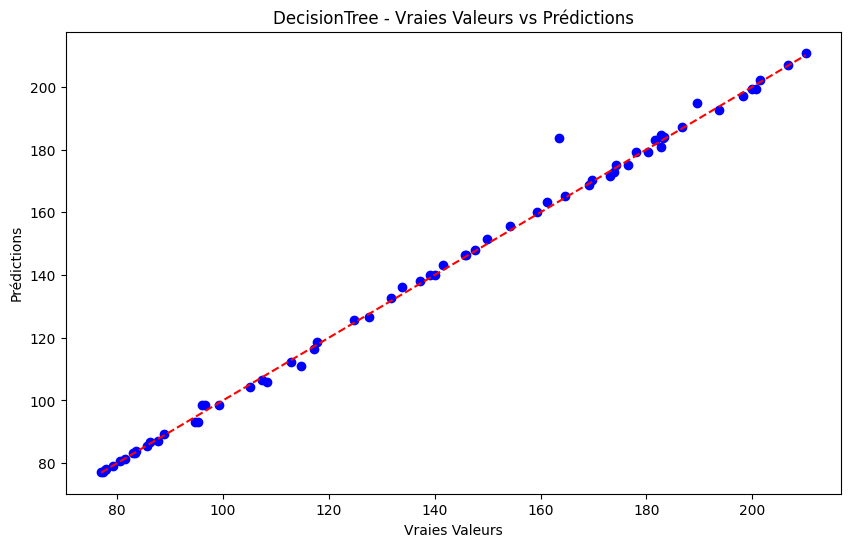

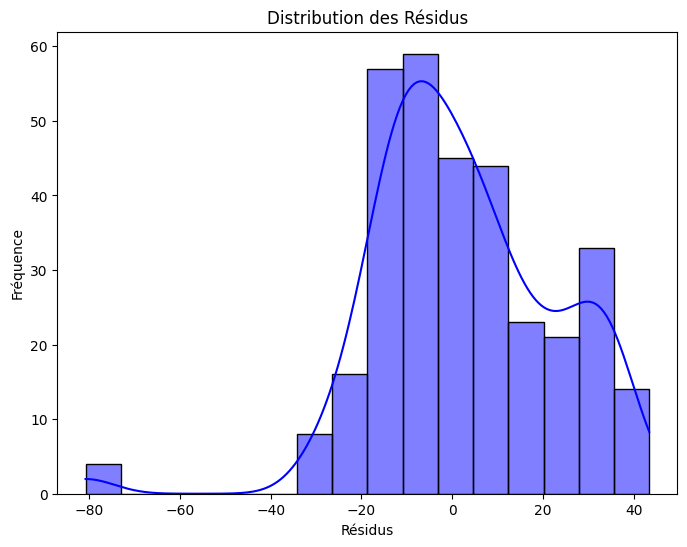

In [15]:


############################# Tster model de  DecisionTree  #############

from sklearn.tree import DecisionTreeRegressor

# Création du modèle de régression par arbre de décision
model_arbre_regress = DecisionTreeRegressor()

# Entraînement du modèle
model_arbre_regress.fit(X_train, y_train)

# Prédiction en utilisant le modèle entraîné
y_pred_test = model_arbre_regress.predict(X_test)


############################# Evaluation de DecisionTree #############
# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score
# Calcul de l'erreur quadratique moyenne (mse) pour les données d'entraînement et de test

mse_tree = mean_squared_error(y_test, y_pred_test, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données d'entraînement et de test
r2_tree = r2_score(y_test, y_pred_test)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour DecisionTree :", mse_tree)
print("Coefficient de détermination (R^2) pour DecisionTree :", r2_tree)


# Tracer les vraies valeurs par rapport aux prédictions du modèle DecisionTree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('DecisionTree - Vraies Valeurs vs Prédictions')
plt.show()



# Calculer les résidus
residuals_tree =y_test -y_pred_test

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_tree, kde=True, color='blue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()



Choix des Hyperparamteres

In [16]:


############################# Choix des Hyperparamteres de DecisionTree #############


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Définition d'une grille d'hyperparamètres avec des valeurs valides 
##########voir explication de ces parametres dans le marquage ######
param_grid = {
    'max_depth': [5, 10, 15, 20, 30 , 40],
    'min_samples_split': [2, 5, 10, 12 , 15],
    'min_samples_leaf': [1, 2, 4, 7, 9],
    'max_features': ['sqrt', 'log2']
}


# Création du modèle de régression par arbre de décision
tree_regressor = DecisionTreeRegressor(random_state=42)

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)
best_params_tree=grid_search.best_params_



Meilleurs hyperparamètres: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


Initialiser  le modele de regression ppour arbre de decision avec best parameters

Erreur quadratique moyenne (RMSE) pour DecisionTree avec les meilleurs hyperparamètres : 1.20082801539047
Coefficient de détermination (R^2) pour DecisionTree avec les meilleurs hyperparamètres : 0.9991860218982721


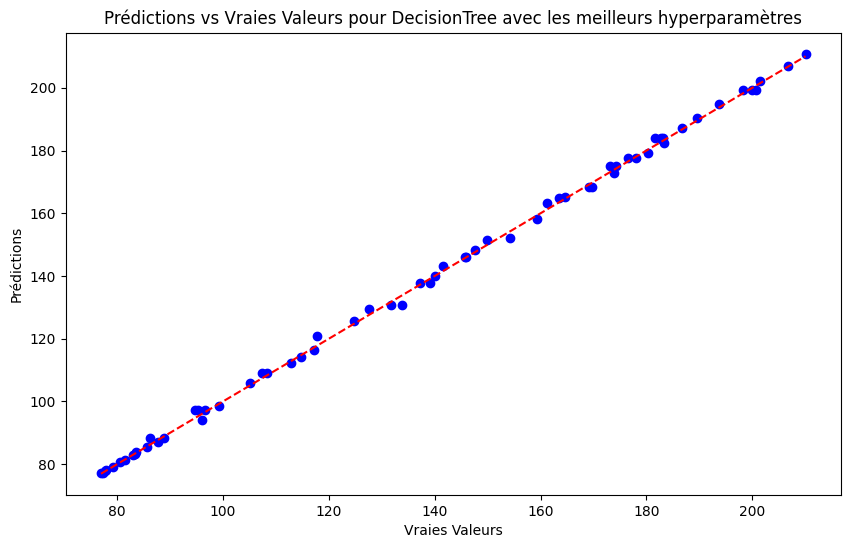

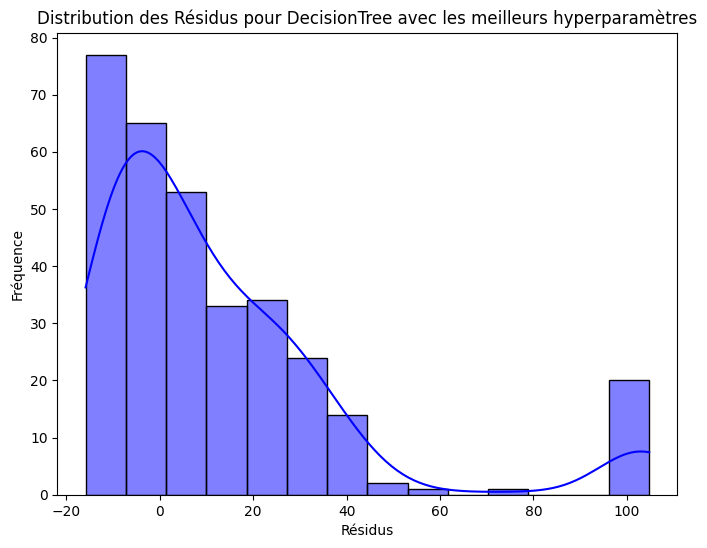

Test de Shapiro-Wilk pour les résidus du modèle DecisionTree avec les meilleurs hyperparamètres:
Statistic: 0.7594972848892212
p-value: 1.9480751679961276e-21
Les résidus ne semblent pas être distribués normalement pour le modèle DecisionTree avec les meilleurs hyperparamètres (p-value <= 0.05)


In [17]:

############################# Tster model de  DecisionTree avec best para  #############

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Création du modèle DecisionTreeRegressor avec les meilleurs hyperparamètres
model_arbre_regress_best = DecisionTreeRegressor(**best_params_tree)

# Entraînement du modèle
model_arbre_regress_best.fit(X_train, y_train)

# Prédiction en utilisant le modèle entraîné
y_pred_test_best = model_arbre_regress_best.predict(X_test)

############################# Evaluation de DecisionTree #############
# Évaluation du modèle
# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
mse_tree_best = mean_squared_error(y_test, y_pred_test_best, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_tree_best = r2_score(y_test, y_pred_test_best)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour DecisionTree avec les meilleurs hyperparamètres :", mse_tree_best)
print("Coefficient de détermination (R^2) pour DecisionTree avec les meilleurs hyperparamètres :", r2_tree_best)



# Tracer les vraies valeurs par rapport aux prédictions du modèle DecisionTree avec les meilleurs hyperparamètres
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Vraies Valeurs pour DecisionTree avec les meilleurs hyperparamètres')
plt.show()



# Calculer les résidus
residuals_tree_best = y_test - y_pred_test_best 

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_tree_best, kde=True, color='blue')
plt.title('Distribution des Résidus pour DecisionTree avec les meilleurs hyperparamètres')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_tree, p_value_tree = shapiro(residuals_tree_best)

print("Test de Shapiro-Wilk pour les résidus du modèle DecisionTree avec les meilleurs hyperparamètres:")
print("Statistic:", statistic_tree)
print("p-value:", p_value_tree)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_tree> alpha:
    print("Les résidus semblent être distribués normalement pour le modèle DecisionTree avec les meilleurs hyperparamètres (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle DecisionTree avec les meilleurs hyperparamètres (p-value <= 0.05)")




GradientBoostingRegressor

Erreur quadratique moyenne (RMSE) pour GradientBoostingRegressor : 1.1559289205074246
Coefficient de détermination (R^2) pour GradientBoostingRegressor : 0.9992457534061655


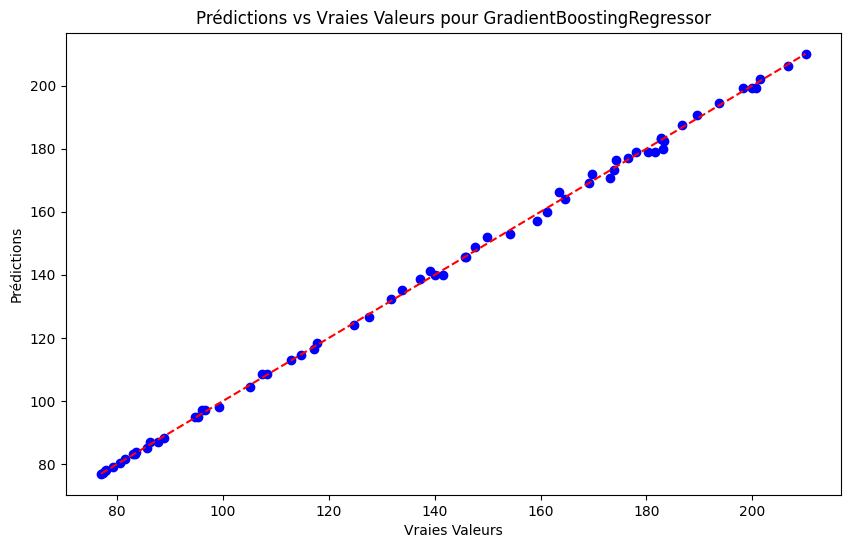

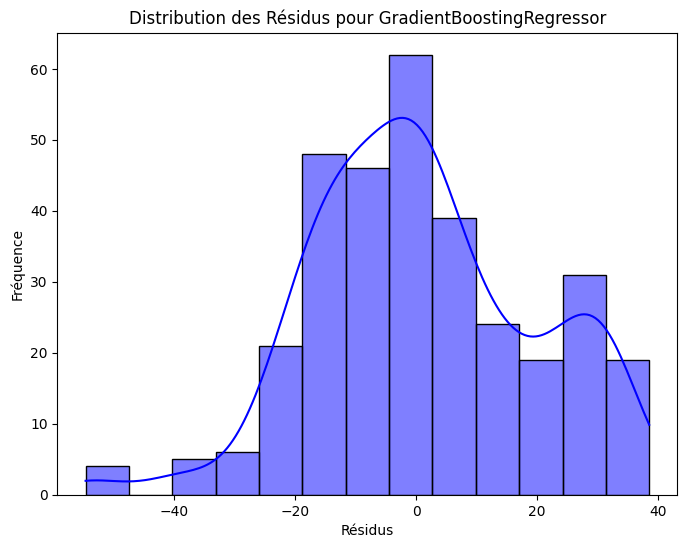

In [7]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

############################# Tster model  GradientBoostingRegressor #############

from sklearn.ensemble import GradientBoostingRegressor

# Création du modèle GradientBoostingRegressor
model_gradient_boosting = GradientBoostingRegressor()

# Entraînement du modèle
model_gradient_boosting.fit(X_train, y_train)

############################# Evaluation de GradientBoostingRegressor #############
# Évaluation du modèle

# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
mse_gradient_boosting = mean_squared_error(y_test, model_gradient_boosting.predict(X_test), squared=False)

# Calcul du coefficient de détermination (R^2) pour les données d'entraînement et de test
r2_gradient_boosting = r2_score(y_test, model_gradient_boosting.predict(X_test))

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour GradientBoostingRegressor :", mse_gradient_boosting)
print("Coefficient de détermination (R^2) pour GradientBoostingRegressor :", r2_gradient_boosting)

y_pred=model_gradient_boosting.predict(X_test)
# Tracer les vraies valeurs par rapport aux prédictions du modèle GradientBoostingRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_gradient_boosting.predict(X_test), color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Vraies Valeurs pour GradientBoostingRegressor')
plt.show()

# Obtenir les prédictions sur les données de validation de chaque pli
predicted_gradient_boosting = cross_val_predict(model_gradient_boosting, X, y, cv=5)

# Calculer les résidus
residuals_gradient_boosting = y_test - y_pred

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_gradient_boosting, kde=True, color='blue')
plt.title('Distribution des Résidus pour GradientBoostingRegressor')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()



Choix d hyperparametres

In [9]:


############################# Choix des Hyperparamteres de GradientBoostingRegressor #############

from sklearn.model_selection import GridSearchCV

# Définition d'une grille d'hyperparamètres avec des valeurs valides
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7,None],
    'min_samples_split': [2, 5, 10,None],
    'min_samples_leaf': [1, 2, 4,],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Création du modèle GradientBoostingRegressor
model_gradient_boosting = GradientBoostingRegressor()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(model_gradient_boosting, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)
best_params_gradient=grid_search.best_params_

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

Meilleurs hyperparamètres: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


Initialiser ld model de  GradientBoostingRegressor

Erreur quadratique moyenne (RMSE) pour GradientBoostingRegressor avec les meilleurs hyperparamètres : 1.578824507741664
Coefficient de détermination (R^2) pour GradientBoostingRegressor avec les meilleurs hyperparamètres : 0.9985929199133331


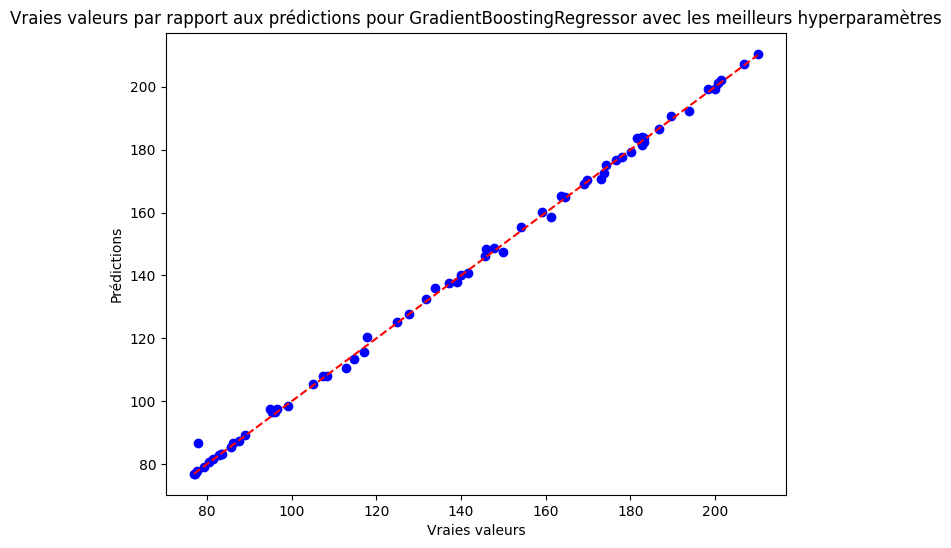

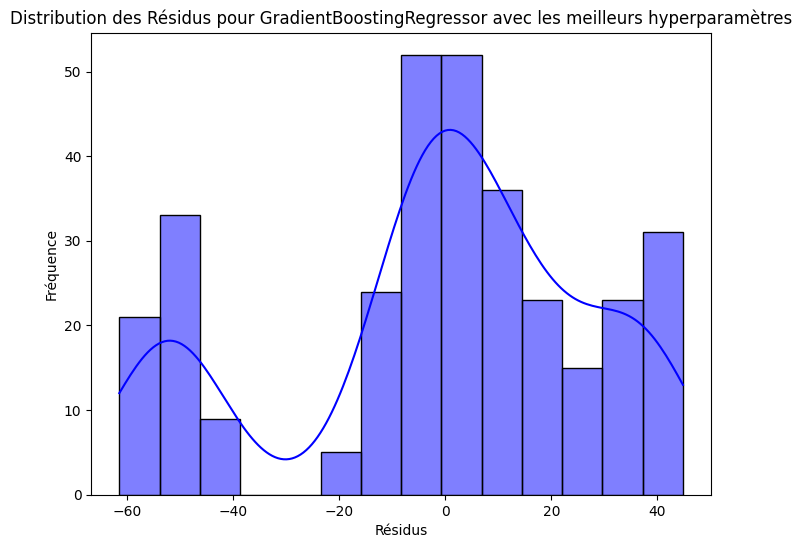

Test de Shapiro-Wilk pour les résidus du modèle GradientBoostingRegressor avec les meilleurs hyperparamètres:
Statistic: 0.9151438474655151
p-value: 1.4660292294368937e-12
Les résidus ne semblent pas être distribués normalement pour le modèle GradientBoostingRegressor avec les meilleurs hyperparamètres (p-value <= 0.05)


In [20]:

############################# Tster model de  GradientBoostingRegressor avec best para  #############

# Création du modèle GradientBoostingRegressor avec les meilleurs hyperparamètres
model_gradient_boosting_best = GradientBoostingRegressor(**best_params_gradient)

# Entraînement du modèle
model_gradient_boosting_best.fit(X_train, y_train)

# Prédiction en utilisant le modèle entraîné
y_pred_test_best = model_gradient_boosting_best.predict(X_test)

############################# Evaluation de GradientBoostingRegressor #############
# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
mse_gradient_boosting_best = mean_squared_error(y_test, y_pred_test_best, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_gradient_boosting_best = r2_score(y_test, y_pred_test_best)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour GradientBoostingRegressor avec les meilleurs hyperparamètres :", mse_gradient_boosting_best)
print("Coefficient de détermination (R^2) pour GradientBoostingRegressor avec les meilleurs hyperparamètres :", r2_gradient_boosting_best)


# Tracer les vraies valeurs par rapport aux prédictions du modèle GradientBoostingRegressor avec les meilleurs hyperparamètres
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_best, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  linestyle='--', color='red')
plt.title('Vraies valeurs par rapport aux prédictions pour GradientBoostingRegressor avec les meilleurs hyperparamètres')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.show()




# Calculer les résidus
residuals_gradient_boosting_best = y_test- y_pred_test_best

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_gradient_boosting_best, kde=True, color='blue')
plt.title('Distribution des Résidus pour GradientBoostingRegressor avec les meilleurs hyperparamètres')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_gradient, p_value_gradient = shapiro(residuals_gradient_boosting_best)
print("Test de Shapiro-Wilk pour les résidus du modèle GradientBoostingRegressor avec les meilleurs hyperparamètres:")
print("Statistic:", statistic_gradient)
print("p-value:", p_value_gradient)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_gradient > alpha:
    print("Les résidus semblent être distribués normalement pour le modèle GradientBoostingRegressor avec les meilleurs hyperparamètres (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle GradientBoostingRegressor avec les meilleurs hyperparamètres (p-value <= 0.05)")




 XGBoost

Erreur quadratique moyenne (RMSE) pour XGBoost : 1.6147486737911716
Coefficient de détermination (R²) pour XGBoost : 0.9985281587463454


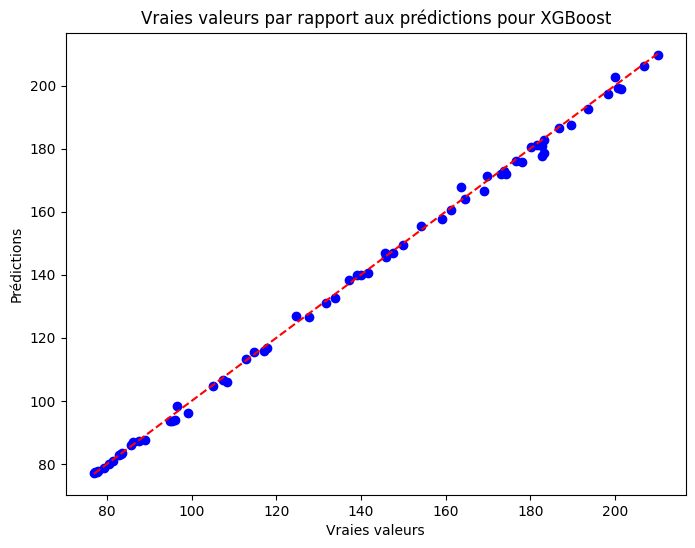

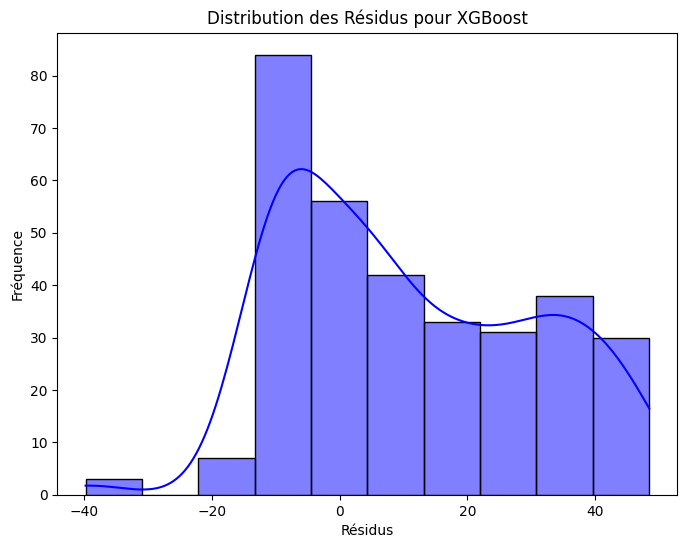

In [21]:
############################# Tster model  XGBoost #############

# Création du modèle XGBoost
import xgboost as xgb
model_xgboost = xgb.XGBRegressor(learning_rate=0.5)

# Entraînement du modèle
model_xgboost.fit(X_train, y_train)

############################# Evaluation de XGBoost #############
# Évaluation du modèle

# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
y_pred_xgboost = model_xgboost.predict(X_test)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour XGBoost :", mse_xgboost)
print("Coefficient de détermination (R²) pour XGBoost :", r2_xgboost)



# Tracer les vraies valeurs par rapport aux prédictions du modèle XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgboost, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  linestyle='--', color='red')
plt.title('Vraies valeurs par rapport aux prédictions pour XGBoost')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.show()



# Calculer les résidus
residuals_xgboost = y_test - y_pred_xgboost

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgboost, kde=True, color='blue')
plt.title('Distribution des Résidus pour XGBoost')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


recherche d hyperparametres 

In [22]:
############################# Choix des Hyperparamteres de XGBoost #############

# Définition d'une grille d'hyperparamètres avec des valeurs valides
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 150]
}

# Création du modèle XGBoost
xgb_model = xgb.XGBRegressor()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)
best_params_xgboots=grid_search.best_params_

Meilleurs hyperparamètres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.7}


Initialisation du model XGBoost avec les best parameters

Erreur quadratique moyenne (RMSE) pour XGBoost avec les meilleurs hyperparamètres : 1.4483108221205512
Coefficient de détermination (R²) pour XGBoost : 0.9988159374369946


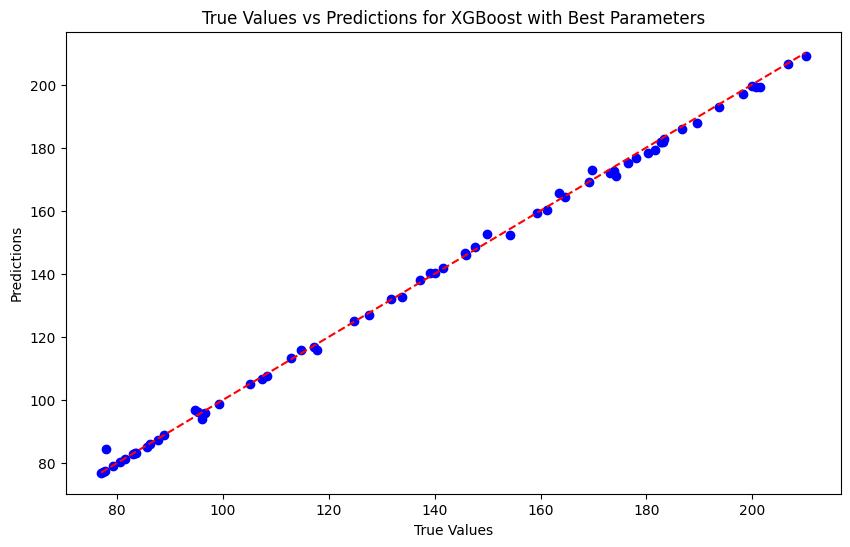

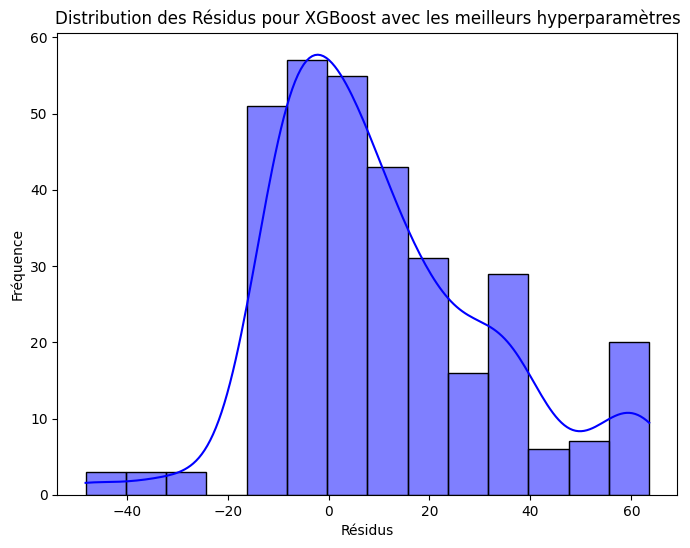

Test de Shapiro-Wilk pour les résidus du modèle XGBoost avec les meilleurs hyperparamètres:
Statistic: 0.9392914175987244
p-value: 2.970647894340317e-10
Les résidus ne semblent pas être distribués normalement pour le modèle XGBoost avec les meilleurs hyperparamètres (p-value <= 0.05)


In [23]:
############################# Tster model de  XGBoost avec best para  #############
from xgboost import XGBRegressor


# Création du modèle XGBoost avec les meilleurs hyperparamètres
model_xgboost_best = XGBRegressor(**best_params_xgboots)

# Entraînement du modèle
model_xgboost_best.fit(X_train, y_train)

# Prédiction en utilisant le modèle entraîné
y_pred_test_xgboost_best = model_xgboost_best.predict(X_test)

############################# Evaluation de XGBoost #############
# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
mse_xgboost_best = mean_squared_error(y_test, y_pred_test_xgboost_best, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_xgboost_best = r2_score(y_test, y_pred_test_xgboost_best)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour XGBoost avec les meilleurs hyperparamètres :", mse_xgboost_best)
print("Coefficient de détermination (R²) pour XGBoost :", r2_xgboost_best )


# Visualisation des différences entre les vraies valeurs et les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_xgboost_best, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('True Values vs Predictions for XGBoost with Best Parameters')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# Calculer les résidus
residuals_xgboost_best = y_test - y_pred_test_xgboost_best

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xgboost_best, kde=True, color='blue')
plt.title('Distribution des Résidus pour XGBoost avec les meilleurs hyperparamètres')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_xgboost, p_value_xgboost = shapiro(residuals_xgboost_best)
print("Test de Shapiro-Wilk pour les résidus du modèle XGBoost avec les meilleurs hyperparamètres:")
print("Statistic:", statistic_xgboost)
print("p-value:", p_value_xgboost)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_xgboost > alpha:
    print("Les résidus semblent être distribués normalement pour le modèle XGBoost avec les meilleurs hyperparamètres (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle XGBoost avec les meilleurs hyperparamètres (p-value <= 0.05)")


RandomForestRegressor

Erreur quadratique moyenne (RMSE) pour RandomForestRegressor : 1.0700386100345223
Coefficient de détermination (R^2) pour RandomForestRegressor : 0.9993536764277733


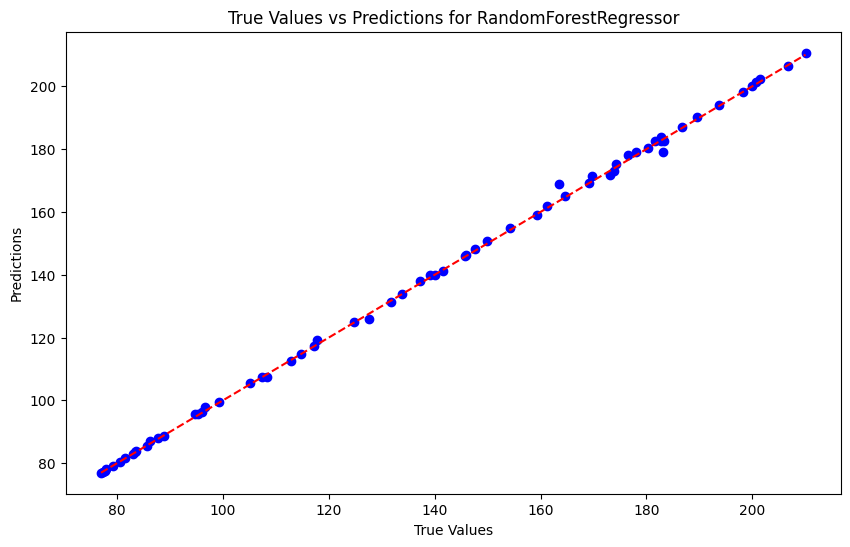

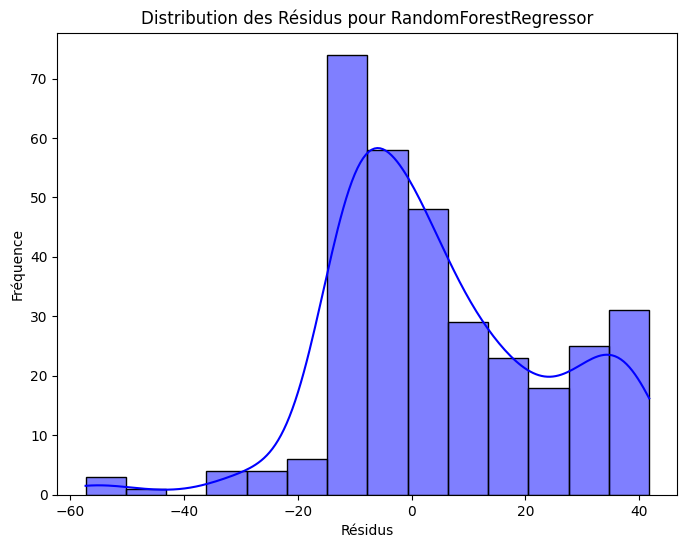

In [24]:


############################# Tster model  RandomForestRegressor #############

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Création du modèle RandomForestRegressor
parametre_unique = {'max_depth': 20} 
model_random_forest = RandomForestRegressor()
# Entraînement du modèle
model_random_forest.fit(X_train, y_train)

############################# Evaluation de RandomForestRegressor #############
# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
y_pred_test_rf = model_random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_rf = r2_score(y_test, y_pred_test_rf)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour RandomForestRegressor :", mse_rf)
print("Coefficient de détermination (R^2) pour RandomForestRegressor :", r2_rf)


# Tracer les vraies valeurs par rapport aux prédictions du modèle RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('True Values vs Predictions for RandomForestRegressor')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Obtenir les prédictions sur les données de validation de chaque pli
predicted_rf = cross_val_predict(model_random_forest, X, y, cv=5)

# Calculer les résidus
residuals_rf = y - predicted_rf

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='blue')
plt.title('Distribution des Résidus pour RandomForestRegressor')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()





Recherche d hyperparametre

In [25]:


############################# Choix des Hyperparamteres de RandomForestRegressor #############

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

# Définition d'une grille d'hyperparamètres avec des valeurs valides
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Création du modèle RandomForestRegressor
model_random_forest = RandomForestRegressor()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model_random_forest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)
best_params_rf=grid_search.best_params_

c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\H P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", l

Meilleurs hyperparamètres: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


initialisation du model avec les bests parameters

Erreur quadratique moyenne (RMSE) pour RandomForestRegressor avec les meilleurs hyperparamètres : 1.748004201666295
Coefficient de détermination (R^2) pour RandomForestRegressor avec les meilleurs hyperparamètres : 0.9982752107258229


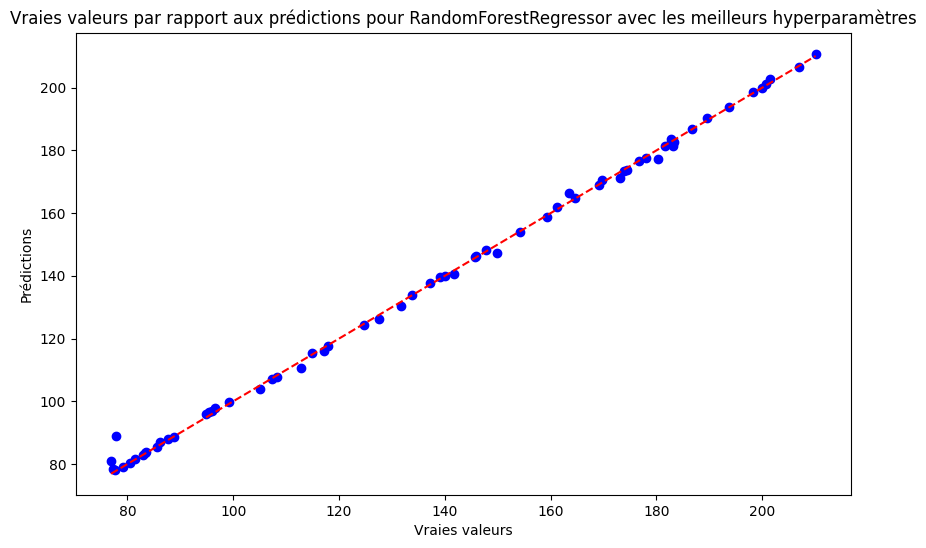

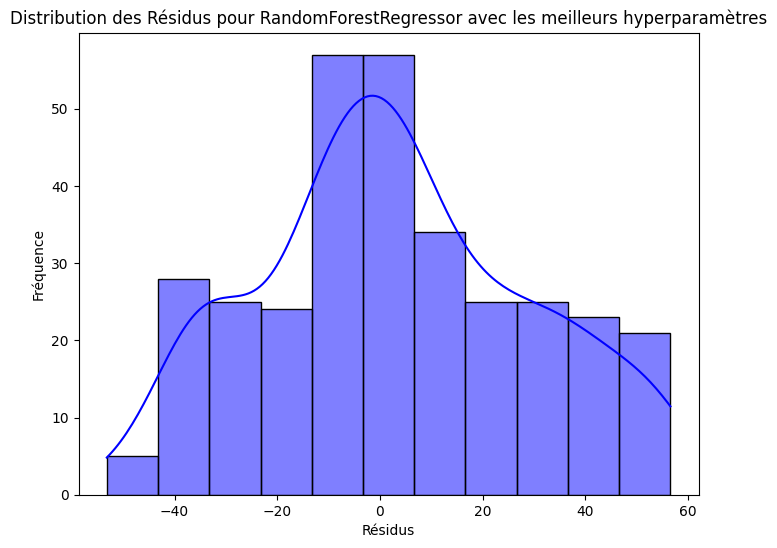

Test de Shapiro-Wilk pour les résidus du modèle RandomForestRegressor avec les meilleurs hyperparamètres:
Statistic: 0.9777029156684875
p-value: 6.351849879138172e-05
Les résidus ne semblent pas être distribués normalement pour le modèle RandomForestRegressor avec les meilleurs hyperparamètres (p-value <= 0.05)


In [26]:

############################# Tster model de  RandomForestRegressor avec best para  #############
from sklearn.ensemble import RandomForestRegressor


# Création du modèle RandomForestRegressor avec les meilleurs hyperparamètres
model_rf_best = RandomForestRegressor(**best_params_rf)

# Entraînement du modèle
model_rf_best.fit(X_train, y_train)

# Prédiction en utilisant le modèle entraîné
y_pred_test_rf_best = model_rf_best.predict(X_test)

############################# Evaluation de RandomForestRegressor #############
# Calcul de l'erreur quadratique moyenne (mse) pour les données de test
mse_rf_best = mean_squared_error(y_test, y_pred_test_rf_best, squared=False)

# Calcul du coefficient de détermination (R^2) pour les données de test
r2_rf_best = r2_score(y_test, y_pred_test_rf_best)

# Affichage des résultats
print("Erreur quadratique moyenne (mse) pour RandomForestRegressor avec les meilleurs hyperparamètres :", mse_rf_best)
print("Coefficient de détermination (R^2) pour RandomForestRegressor avec les meilleurs hyperparamètres :", r2_rf_best)

# Réaliser la validation croisée avec 5 plis
scores_rf_best = cross_val_score(model_rf_best, X, y, cv=5, scoring='neg_mean_squared_error')

# Tracer les vraies valeurs par rapport aux prédictions du modèle RandomForestRegressor avec les meilleurs hyperparamètres
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Vraies valeurs par rapport aux prédictions pour RandomForestRegressor avec les meilleurs hyperparamètres')
plt.xlabel('Vraies valeurs')
plt.ylabel('Prédictions')
plt.show()

# Obtenir les prédictions sur les données de validation de chaque pli
predicted_rf_best = cross_val_predict(model_rf_best, X, y, cv=5)

# Calculer les résidus
residuals_rf_best = y - predicted_rf_best

# Tracer la distribution des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf_best, kde=True, color='blue')
plt.title('Distribution des Résidus pour RandomForestRegressor avec les meilleurs hyperparamètres')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Effectuer le test de Shapiro-Wilk pour tester la normalité des résidus
statistic_rf, p_value_rf = shapiro(residuals_rf_best)
print("Test de Shapiro-Wilk pour les résidus du modèle RandomForestRegressor avec les meilleurs hyperparamètres:")
print("Statistic:", statistic_rf)
print("p-value:", p_value_rf)

# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p_value_rf > alpha:
    print("Les résidus semblent être distribués normalement pour le modèle RandomForestRegressor avec les meilleurs hyperparamètres (p-value > 0.05)")
else:
    print("Les résidus ne semblent pas être distribués normalement pour le modèle RandomForestRegressor avec les meilleurs hyperparamètres (p-value <= 0.05)")



C:\Users\H P\AppData\Local\Temp\ipykernel_12832\2597547022.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés
C:\Users\H P\AppData\Local\Temp\ipykernel_12832\2597547022.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés
C:\Users\H P\AppData\Local\Temp\ipykernel_12832\2597547022.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés
C:\Users\H P\AppData\Local\Temp\ipykernel_12832\2597547022.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

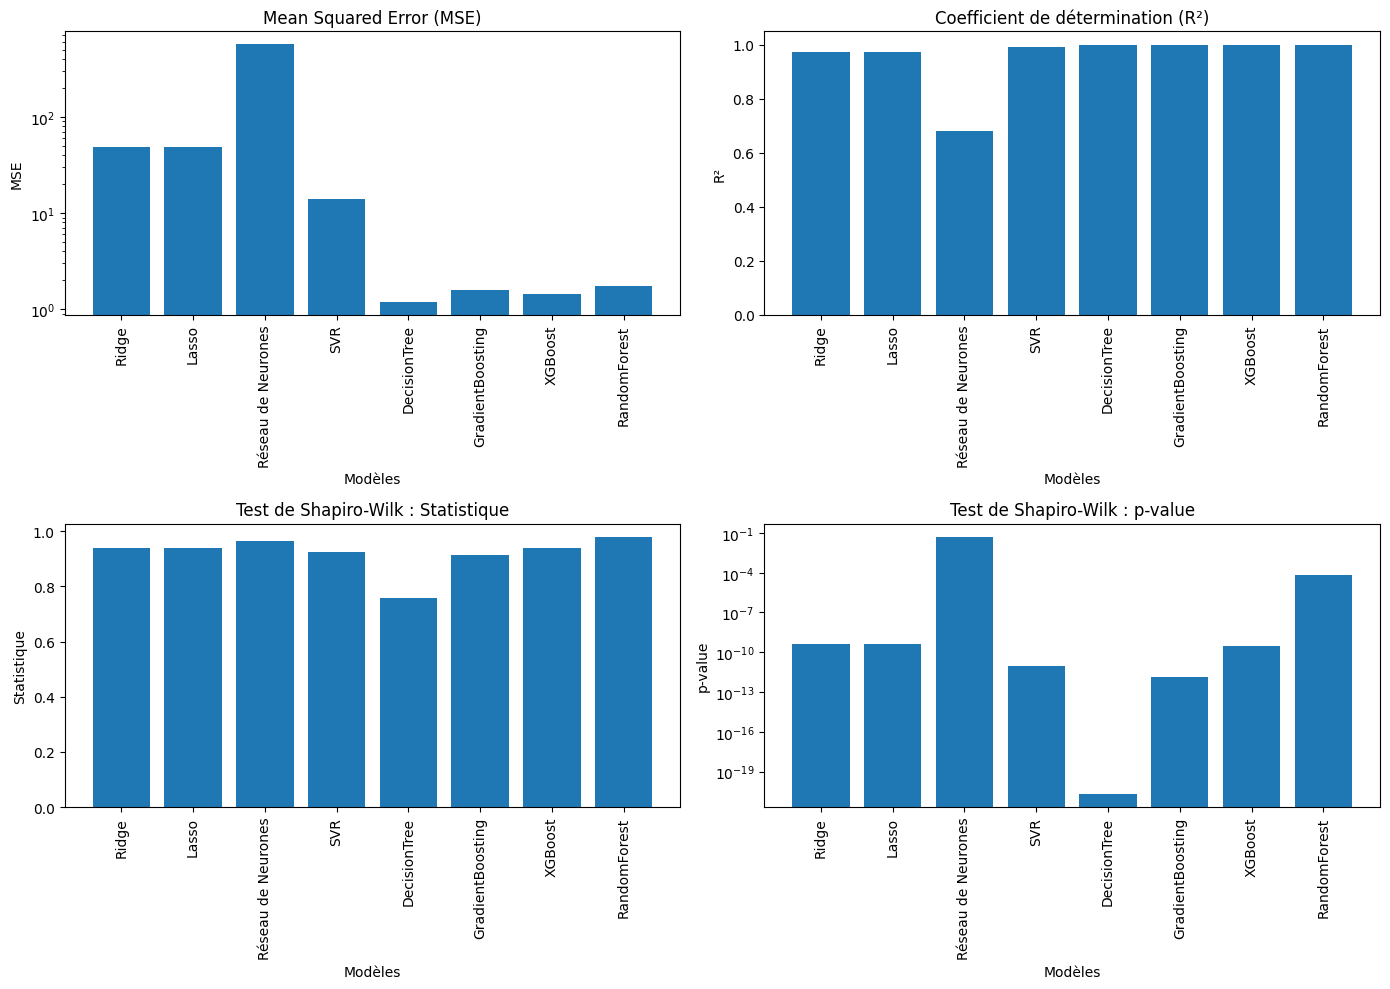

In [27]:
import matplotlib.pyplot as plt

# Liste des modèles
models = ['Ridge', 'Lasso', 'Réseau de Neurones', 'SVR', 'DecisionTree', 'GradientBoosting', 'XGBoost', 'RandomForest']

# Liste des métriques pour chaque modèle
mse_values = [mse_ridge, mse_lasso, mse_resau, mse_svr, mse_tree_best, mse_gradient_boosting_best, mse_xgboost_best, mse_rf_best]
r2_values = [r2_ridge, r2_lasso, r2_reseau, r2_svr, r2_tree_best, r2_gradient_boosting_best, r2_xgboost_best, r2_rf_best]
statistic_values = [statistic_ridge, statistic_lasso, statistic_resau, statistic_svr, statistic_tree, statistic_gradient, statistic_xgboost, statistic_rf]
p_value_values = [p_value_ridge, p_value_lasso, p_value_resau, p_value_svr, p_value_tree, p_value_gradient, p_value_xgboost, p_value_rf]

# Création des graphiques
plt.figure(figsize=(14, 10))

# MSE
plt.subplot(2, 2, 1)
plt.yscale('log')
plt.bar(models, mse_values)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés

# R²
plt.subplot(2, 2, 2)
plt.bar(models, r2_values)
plt.title('Coefficient de détermination (R²)')
plt.xlabel('Modèles')
plt.ylabel('R²')
plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés

# Test de Shapiro-Wilk : Statistique
plt.subplot(2, 2, 3)
plt.bar(models, statistic_values)
plt.title('Test de Shapiro-Wilk : Statistique')
plt.xlabel('Modèles')
plt.ylabel('Statistique')
plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés

# Test de Shapiro-Wilk : p-value
plt.subplot(2, 2, 4)
plt.yscale('log')
plt.bar(models, p_value_values)
plt.title('Test de Shapiro-Wilk : p-value')
plt.xlabel('Modèles')
plt.ylabel('p-value')
plt.gca().set_xticklabels(models, rotation=90)  # Rotation des étiquettes à 90 degrés

plt.tight_layout()
plt.show()